<a href="https://colab.research.google.com/github/jhonatanlang/DSP2/blob/master/Activity_6/Atividade_6_Fase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 6: Efeito da Fase e Sistemas Radar

####Alunos : Hazael dos Santos Batista; Jhonatan de Freitas Lang

## Sinal de Radar
Até o momento, nos preocupamos apenas com a **magnitude** da resposta em frequência de filtros seletores de sinais. Nesta atividade, iremos analisar o efeito da fase.

Considere a situação em que um sinal de radar é corrompido por ruído aditivo que ocupa uma banda de frequências distinta daquela do sinal. Para recuperar o sinal de interesse, é necessário aplicar um filtro. Entretanto, como há requisitos temporais a atender para a identificação do tempo de atraso a partir do sinal refletido, é importante que o filtro não distorça o sinal recebido. Isso será explorado nesta atividade.

## Atraso de Grupo
Uma figura de mérito usada para verificar as distorções de fase de um sistema é o atraso de grupo, definido como

$\tau (\omega) = \mathrm{grd} [H(e^{j\omega})] = - \frac{\mathrm{d} [\arg H(e^{j\omega})]}{\mathrm{d}\omega}$

Verifique o atraso de grupo do sistema atraso ideal ([[1](#referencias)] p. 168, capítulo 5, Análise no domínio transformado de sistemas LIT, seção 5.1.1, Fase e atraso de grupo da resposta em frequência).

A atividade seguinte foi adaptada de [[2](#referencias)]. Carregue o arquivo de dados `gdeldata.mat`. No Python, use a função `loadmat` do módulo `scipy.io` ([documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)).

####Considere o sinal  apresentado no vetor `x1`. Esse sinal será corrompido por ruído aditivo, mostrado, para fins didáticos, no vetor `noise`. Observe a faixa de frequências que o sinal e o ruído ocupam. É possível projetar um filtro que recupere o sinal?

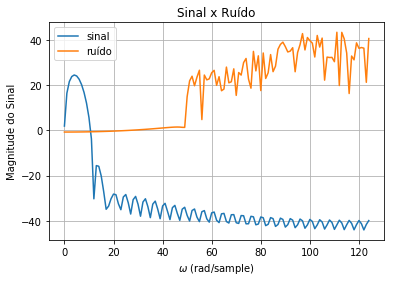

In [123]:
import numpy as np # para usar funções que lidam com vetores
import matplotlib.pyplot as plt # para desenho
import scipy.io as sio
from scipy import signal as signal

import requests

try:
  f = open("/content/gdeldata.mat", "rb")
except FileNotFoundError:
  try:
    response = requests.get('https://github.com/jhonatanlang/DSP2/raw/master/Activity_6/gdeldata.mat')
    f = open("/content/gdeldata.mat", "wb")
    f.write(response.content)
    f.close()
  except FileNotFoundError:
    print('deu pau')

# Carregando conteúdo do arquivo
mat_contents = sio.loadmat("/content/gdeldata.mat")

#display(sorted(mat_contents.keys())) # ['a', 'b', 'h', 'noise', 'pnd_1', 'pnd_2', 'pulse', 'x1', 'x2']

# Extraindo conteúdo do arquivo carregado
a = mat_contents['a']
b = mat_contents['b']
h = mat_contents['h']
x1 = mat_contents['x1']
noise = mat_contents['noise']
pnd1 = mat_contents['pnd_1']
pulse = mat_contents['pulse']

noise_fft = np.fft.fft(noise)
x1_fft = np.fft.fft(x1)
#pnd1_fft = np.fft.fft(pnd1)

#
plt.plot(20*np.log10(np.abs(x1_fft[0]))[:int(250/2)])
plt.plot(20*np.log10(np.abs(noise_fft[0]))[:int(250/2)])
#plt.plot(20*np.log10(np.abs(pnd1_fft[0]))[:int(250/2)])
plt.title('Sinal x Ruído')
plt.ylabel('Magnitude do Sinal')
plt.xlabel('$\omega$ (rad/sample)')
plt.legend(["sinal", "ruído"])
plt.grid()
plt.show()


Pela figura acima podemos ver que o sinal de interesse pode ser recuperado, pois este e o ruído estão em bandas de frequência diferentes. Porem deve se tomar cuidado com a linearidade do defasamento em frequência do filtro. 

## Fase em Filtros FIR e IIR
Dois filtros foram projetados. O filtro $H_1(z)$, de resposta finita ao impulso, é representado por sua resposta ao impulso no vetor `h`. Já $H_2(z)$, um filtro IIR, é representado por dois vetores de coeficientes, `a` e `b`. Confirme que os dois filtros apresentam resposta em magnitude que permite a recuperação do sinal de interesse. Sobreponha as respostas de cada filtro em um único gráfico.

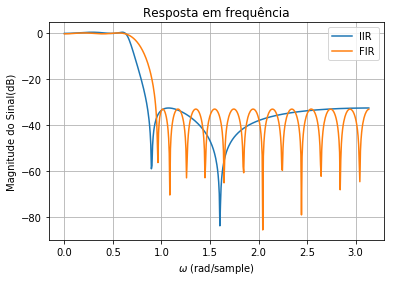

In [124]:
# Resposta em frequência
plt.figure(2)
H2 = signal.freqz(b[0],a[0]) # IIR
plt.plot(H2[0], 20*np.log10(np.abs(H2[1])))
H1 = signal.freqz(h[0]) # FIR
plt.plot(H1[0], 20*np.log10(np.abs(H1[1])))
plt.title('Resposta em frequência')
plt.ylabel('Magnitude do Sinal(dB)')
plt.xlabel('$\omega$ (rad/sample)')
plt.legend(["IIR", "FIR"])
plt.grid()
plt.show()



####Observe a resposta ao impulso do filtro FIR. É simétrica? Que informação sobre a fase é possível estimar a partir dessa resposta ao impulso? 

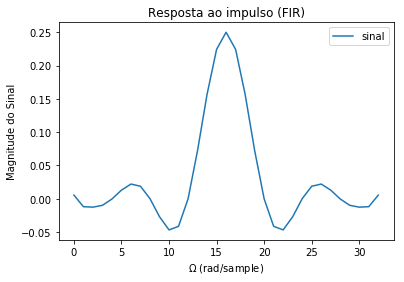

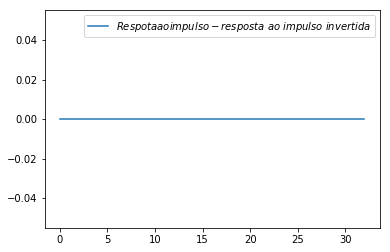

In [125]:
plt.figure(4)
plt.plot(h[0])
plt.title('Resposta ao impulso (FIR)')
plt.ylabel('Magnitude do Sinal')
plt.xlabel('$\Omega$ (rad/sample)')
plt.legend(["sinal"])
plt.show()

plt.figure(5)
plt.plot(h[0] - np.flip(h[0]))
plt.legend(["$Respota ao impulso - resposta\\ ao\\ impulso\\ invertida$"])
plt.show()

Subtraindo do sinal da resposta ao impulso do sinal a resposta do impulso do sinal invertida, o resultado é um zero constante. Isso prova a simetria. Por causa da simetria espera-se uma fase linear no domínio da frequência.

####Calcule e mostre o atraso de grupo doa filtros IIR e FIR.

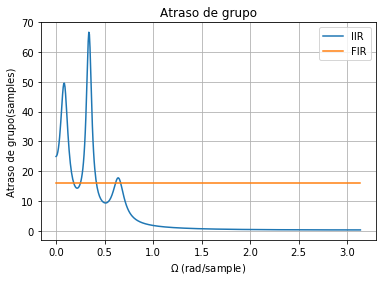

In [126]:
# Group delay
plt.figure(3)
grp2 = signal.group_delay((b[0],a[0])) # IIR
plt.plot(grp2[0], grp2[1])
grp1 = signal.group_delay((h[0],[1])) # FIR
plt.plot(grp1[0], grp1[1])
plt.title('Atraso de grupo')
plt.ylabel('Atraso de grupo(samples)')
plt.xlabel('$\Omega$ (rad/sample)')
plt.legend(["IIR", "FIR"])
plt.grid()
plt.show()

O filtro FIR apresenta um atraso constante igual a metade de sua ordem. Já o filtro IIR varia o atraso de amostra do sinal de acordo com a frequência digital do sinal de entrada (rad/sample), isto é devido a sua fase não ser linear.

####Filtre o sinal $x_1(n)$ usando cada um dos filtros. Desenhe e analise os sinais de saída.

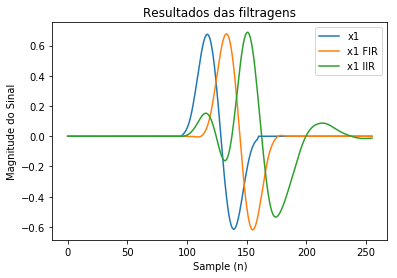

In [127]:
response_x1_IIR = signal.lfilter(b[0], a[0], x1[0])
response_x1_FIR = signal.lfilter(h[0], [1], x1[0])

plt.figure(6)
plt.plot(x1[0])
plt.plot(response_x1_FIR)
plt.plot(response_x1_IIR)
plt.title('Resultados das filtragens')
plt.ylabel('Magnitude do Sinal')
plt.xlabel('Sample (n)')
plt.legend(['x1', 'x1 FIR', 'x1 IIR'])
plt.show()

Sobrepondo o resultado das filtragens e do sinal original é possível enxergar o diferente atraso dos diferentes filtros. Também a distorção do sinal no caso do filtro IIR, isso acontece porque as difrentes componentes de frequência do sinal possuem diferentes atrasos de fase .

## Distorção de Pulso
Filtre o sinal `pulse` com cada um dos filtros. Desenhe e analise os sinais de saída.

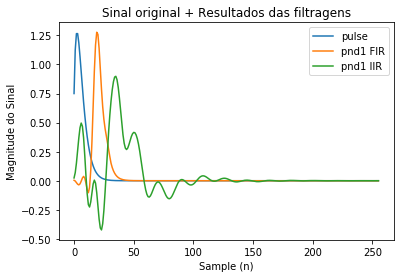

In [133]:
response_pnd1_IIR = signal.lfilter(b[0], a[0], pulse[0])
response_pnd1_FIR = signal.lfilter(h[0], [1], pulse[0])

plt.figure(7)
plt.plot(pulse[0])
plt.plot(response_pnd1_FIR)
plt.plot(response_pnd1_IIR)
plt.title('Sinal original + Resultados das filtragens')
plt.ylabel('Magnitude do Sinal')
plt.xlabel('Sample (n)')
plt.legend(['pulse', 'pulse FIR', 'pulse IIR'])
plt.show()

Aqui podemos observar o sinal pulse original junto dos resultados de suas filtragens. O filtro FIR replicou quase perfeitamente o sinal, salvo a distorção no inicio, já esperada, pois o filtro possui fase linear na banda passante. Já o filtro IIR apresentou grande distorção do sinal.

## Remoção de Ruído de um Pulso
Filtre o sinal `pnd_1` com cada um dos filtros. Desenhe os sinais de saída e estime o tempo de atraso do pulso de cada um dos sinais resultantes. Explique qual o melhor filtro, FIR ou IIR, para essa aplicação.

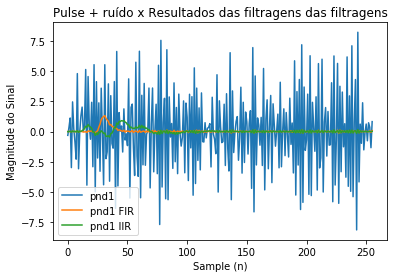

In [128]:
response_pnd1_IIR = signal.lfilter(b[0], a[0], pnd1[0])
response_pnd1_FIR = signal.lfilter(h[0], [1], pnd1[0])

plt.figure(8)
plt.plot(pnd1[0])
plt.plot(response_pnd1_FIR)
plt.plot(response_pnd1_IIR)
plt.title('Pulse + ruído x Resultados das filtragens das filtragens')
plt.ylabel('Magnitude do Sinal')
plt.xlabel('Sample (n)')
plt.legend(['pnd1', 'pnd1 FIR', 'pnd1 IIR'])
plt.show()

Na figura acima pode-se ver o sinal antes e depois de ser filtrado. Seria impossível reconhecer o pulso em meio ao ruído antes da aplicação do filtro. 


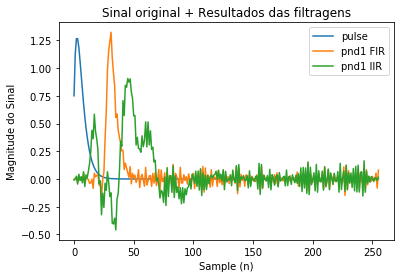

In [132]:
plt.figure(7)
plt.plot(pulse[0])
plt.plot(response_pnd1_FIR)
plt.plot(response_pnd1_IIR)
plt.title('Sinal original + Resultados das filtragens')
plt.ylabel('Magnitude do Sinal')
plt.xlabel('Sample (n)')
plt.legend(['pulse', 'pnd1 FIR', 'pnd1 IIR'])
plt.show()

Quanto a remoção de ruído, ambos os filtros funcionaram de maneira razoável, mantendo uma proporção sinal-ruído semelhante. Apesar disso, o filtro IIR possui distorção e atraso maior do que o filtro FIR, portanto o filtro FIR é o filtro aconselhado para esta aplicação.

##Conclusão

Foi possível com está atividade observar que para aplicações que possuem requisitos de tempo, além de se preoucupar com a magnitude do filtro em relação a frequência deve-se tomar cuidados com a fase ou atraso de grupo do filtro.  Para aplicações ocm tais requisitos filtros FIR são mais indicados que filtros IIR, pois possuem menor distorção do sinal.


**Para uma visão geral gráfica sobre sistemas radar, confira as Figuras 1-1, 1-2 e 1-3 de [[3](#referencias)]. Sobre filtros casados, são interessantes os exemplos de [[4](#referencias)].
Entregue os resultados na forma de um Jupyter Notebook, via Moodle, com todo o código, resultados (figuras e arquivos extras, se necessário), análise e conclusões.**

# [Referências](#referencias)

[1] Oppenheim, A. V.; Schafer, R. W. Processamento em tempo discreto de sinais. 3. ed. São Paulo:Pearson, 2012.

[2] ECE 535 Digital Signal Processing: Matlab Assignment 3: Group Delay, Spring 2001. Disponível em: https://ece.gmu.edu/~kwage/courses/ece535/spr01/matlab/proj3.pdf

[3] ROHDE&SCHWARZ Pulsed RADAR signal generation and measurements : Educational Note 1MA234_0e. Disponível em: https://cdn.rohde-schwarz.com/pws/dl_downloads/dl_application/application_notes/1ma234/1MA234_0e_PulsedRadarEduNote.pdf

[4] WIKIPEDIA. Matched Filter: Examples. Disponível em: https://en.wikipedia.org/wiki/Matched_filter#Examples